<a href="https://www.kaggle.com/hasinisadunikasilva/skin-cancer-detection-dcnn?scriptVersionId=88151275" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import glob
import cv2
import re
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten 
import keras
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
def define_model():
  model = Sequential()
  model.add(Conv2D(filters=4  ,kernel_size=(5,5), strides=(3,3), 
                  activation='relu', input_shape=(128,128,1))) 
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))   
  model.add(Conv2D(kernel_size=(5,5), strides=(2,2), 
                  filters=4  , activation='relu', input_shape=(21,21, 1))) 
  model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
  model.add(Flatten())
  model.add(Dense(units=4, activation='tanh'))
  model.add(Dense(2, activation='softmax')) 
  print('\nCNN model : ')
  model.summary()
  return model

In [3]:
def compile_fit_model(model):
  print('\nTraining the dataset : ')
  OPTIMIZER = SGD(learning_rate=0.1)
  x_train_gs=np.load('../input/skincancerdetectiondcnn/train_dataset/x_train.npy')
  y_train_gs=np.load('../input/skincancerdetectiondcnn/train_dataset/y_train.npy')
  x_train, x_val, y_train, y_val = train_test_split(x_train_gs, y_train_gs,test_size=0.2,
                                                    random_state=15)
  model.compile(optimizer=OPTIMIZER, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
  model_fit = model.fit(x=x_train, y=y_train, epochs=50,
                        batch_size=32, validation_data=(x_val, y_val),verbose=1)
                            
  print('Graph of epochs vs loss')
  %matplotlib inline 
  plt.figure() 
  plt.xlabel('Epochs') 
  plt.ylabel('Loss') 
  plt.plot(model_fit.history['loss']) 
  plt.plot(model_fit.history['val_loss']) 
  plt.legend(['Training', 'Validation'])
  plt.figure() 
  plt.show()
  return model

In [4]:
def plot_normalized_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') /cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Training dataset : 
     No. of images : 2000
     Input size to the CNN model : 128*128
Testing dataset : 
     No. of images : 120
     Input size to the CNN model : 128*128


2022-02-18 10:15:17.379515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-18 10:15:17.465054: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-18 10:15:17.465750: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-18 10:15:17.466841: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil


CNN model : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 42, 42, 4)         104       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 4)           404       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 4)           0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 1028      
_________________________________________________________________
dense_1 (Dense)              (None, 2)    

2022-02-18 10:15:22.524265: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-02-18 10:15:23.726385: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


50/50 [==============================] - 7s 9ms/step - loss: 0.6923 - accuracy: 0.5250 - val_loss: 0.6888 - val_accuracy: 0.5575
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6891 - accuracy: 0.5437 - val_loss: 0.6933 - val_accuracy: 0.5150
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.5337 - val_loss: 0.6851 - val_accuracy: 0.5275
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5544 - val_loss: 0.6965 - val_accuracy: 0.5075
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6832 - accuracy: 0.5394 - val_loss: 0.6791 - val_accuracy: 0.6250
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.5612 - val_loss: 0.6922 - val_accuracy: 0.5175
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6760 - accuracy: 0.5738 - val_loss: 0.6996 - val_accuracy: 0.4925
Epoch 8/50
50/50 [=============

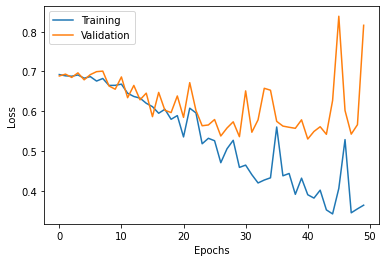

<Figure size 432x288 with 0 Axes>


Evalation with testing dataset: 
4/4 - 0s - loss: 0.7030 - accuracy: 0.6500
Test accuracy :  64.99999761581421 %
Confusion matrix, with normalization
[[0.96666667 0.03333333]
 [0.66666667 0.33333333]]


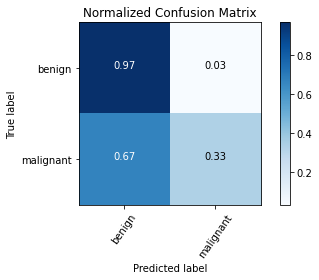

In [5]:
def main():
    print('Training dataset : ')
    print('     No. of images : 2000')
    print('     Input size to the CNN model : 128*128') 
    print('Testing dataset : ')
    print('     No. of images : 120')
    print('     Input size to the CNN model : 128*128')
    model=define_model() 
    model=compile_fit_model(model) 
    model.save("./model.h5")
    x_test=np.load('../input/skincancerdetectiondcnn/test_dataset/x_test.npy')
    y_test=np.load('../input/skincancerdetectiondcnn/test_dataset/y_test.npy')
    print('\nEvalation with testing dataset: ')
    score = model.evaluate(x_test, y_test, verbose=2) 
    print('Test accuracy : ', score[1]*100,'%')  
    cm_plot_label =['benign', 'malignant'] # 0 - benign, 1 - malignant
    y_predict = model.predict(x_test).argmax(axis=1)
    cm=confusion_matrix(y_test.argmax(axis=-1), y_predict, normalize='true')
    plot_normalized_confusion_matrix(cm, cm_plot_label, title ='Normalized Confusion Matrix')

if __name__ == "__main__":
        main()